# **R Mini-Project**


## Setting up the environment




In [209]:
# Installing all needed packages
install.packages("ISLR", quiet=TRUE)
install.packages("corrplot", quiet=TRUE)
install.packages("psych", quiet=TRUE)
install.packages("FNN", quiet=TRUE)
install.packages("caret", quiet=TRUE)
install.packages("ellipse", quiet=TRUE)
install.packages("mclust", quiet=TRUE)
install.packages("mlr", quiet = TRUE)

Global options for aestetics:



In [210]:
options(width=140)

font_size_title = 1.5
font_size_labels = 1.5
font_size_axis = 1.5

## Data Loading and primary analysis



 



In [211]:
library(ISLR)

data(package="ISLR")
df <- Wage

#Output first 6 rows
head(df)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


In [212]:
length(factor(df[['year']]))

[1] 3000

In [213]:
length(factor(df[['year']])) == nrow(df)

[1] TRUE

In [214]:
colnames(df)

[1] "year"       "age"        "maritl"     "race"       "education"  "region"     "jobclass"   "health"     "health_ins" "logwage"   
[11] "wage"

**Why:**

I decided to use the wages data set from ISLR, because it seems to be the simplest yet effective way to achieve given project goals. Statistics within such data sets are typically the most understandable even without any computations.


**Goal:**

The main goal of the project for it not to be completely aimless it to try to predict the wage based of several population attributes.


**Takeaway:**

Let's firstly understand the structure of the data set.
We have 3000 rows, each row representing a human and his/her attributes, which is more than sufficient for our goals.
The attributes are: 

* year: Year the observation was recorded (numerical)
* age: Age of the observed human (numerical)
* maritl: Marital status (nominal)
*race: Race of a human (nominal)
* education: Education degree (ordinal)
* region: Region (Middle Atlantic region is the only one present so that variable should not be taken into account) 
* jobclass: Type of job done by the observation (nominal)
* health: Health condition (ordinal)
* Health insurance: Boolean factor of health insurance existance (ordinal)
* logwage: Log of workers wage (numerical)
* wage: Workers raw wage (numerical)


(The more detailed information with exact numbers is below)





While the region is the one and only, we can get rid of it now.


In [215]:
df$region <- NULL

In [216]:
head(df)

,year,age,maritl,race,education,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


### **Statistical distributions and Histograms**
 


**Why:** 

It's a great idea to find out what destribution our variables have, as it will define our prediction approaches in future.

**Takeaway:** 

Using a _summary_ function we can see all precise numbers and more or less understand the distributions they have. If it is not so clear in terms of numbers, we should call _hist_ functions to visually see the given distributions.


From summary we do not see standard deviation, but can estimate it from the interquartile range (IQR).

Wage mean and median are relatively close to each other (in IQR unit of 128.68 - 85.38 = 12). So, wage is from an approximately symmetric sample distribution with a slight right skew or outliers (because median < mean). 
Min is actually 91 units away from the mean and 298 units away from max value. So, the mean is pulled to the right by (likely) a single large outlier of 400.

In [217]:
print(summary(df))

      year           age                     maritl           race                   education             jobclass   
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480   1. < HS Grad      :268   1. Industrial :1544  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293   2. HS Grad        :971   2. Information:1456  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190   3. Some College   :650                        
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37   4. College Grad   :685                        
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                   5. Advanced Degree:426                        
 Max.   :2009   Max.   :80.00                                                                                         
            health      health_ins      logwage           wage       
 1. <=Good     : 858   1. Yes:2083   Min.   :3.000   Min.   : 20.09  
 2. >=Very Good:2142   2. N

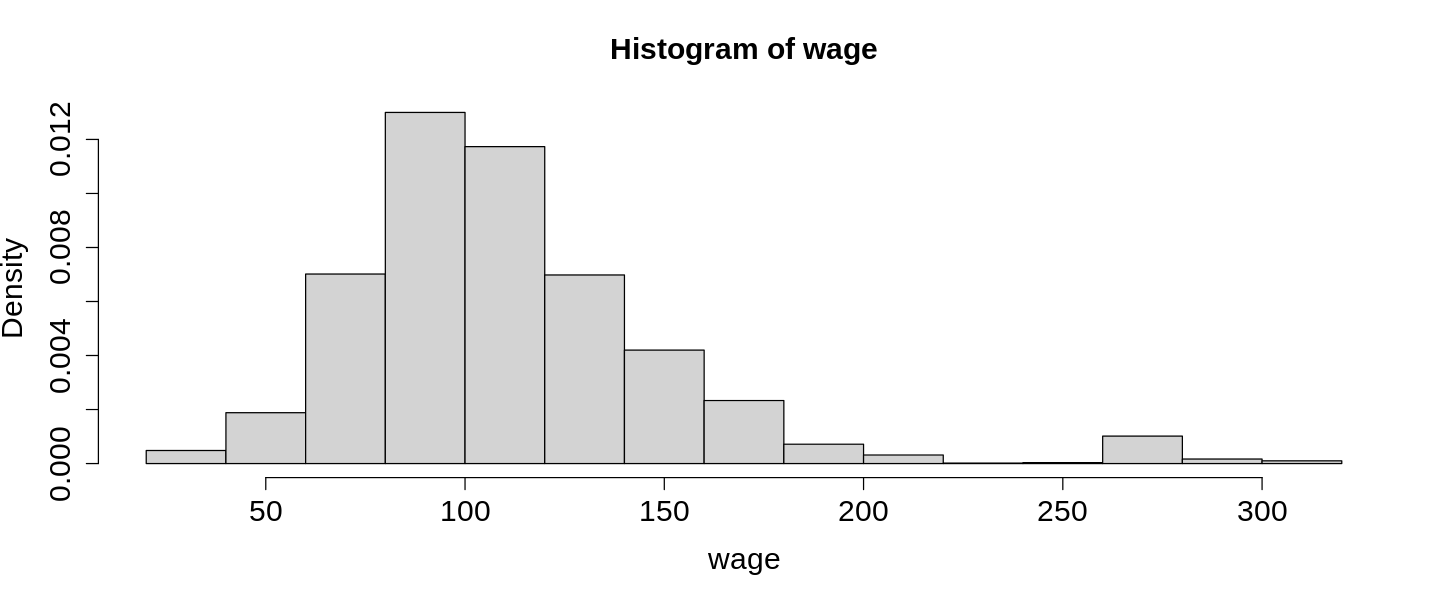

In [218]:
options(repr.plot.width=12, repr.plot.height=5)

hist(df$wage, xlab='wage',  ylab="Density", main="Histogram of wage", prob=TRUE, 
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)

### **Correlation and prediction**
 






In [219]:
#making the set of numeric variables (otherwise cor won't work)
df <- sapply(df, as.numeric)

In [220]:
res <- cor(df)

print(round(res, 2))


            year   age maritl  race education jobclass health health_ins logwage  wage
year        1.00  0.04  -0.01  0.03      0.01    -0.01   0.00       0.01    0.08  0.07
age         0.04  1.00   0.32 -0.02      0.07     0.09  -0.14      -0.14    0.22  0.20
maritl     -0.01  0.32   1.00 -0.05     -0.02     0.03  -0.04      -0.06    0.09  0.07
race        0.03 -0.02  -0.05  1.00      0.04     0.06  -0.02       0.04   -0.03 -0.03
education   0.01  0.07  -0.02  0.04      1.00     0.30   0.17      -0.21    0.47  0.48
jobclass   -0.01  0.09   0.03  0.06      0.30     1.00   0.07      -0.15    0.21  0.21
health      0.00 -0.14  -0.04 -0.02      0.17     0.07   1.00      -0.08    0.16  0.15
health_ins  0.01 -0.14  -0.06  0.04     -0.21    -0.15  -0.08       1.00   -0.37 -0.31
logwage     0.08  0.22   0.09 -0.03      0.47     0.21   0.16      -0.37    1.00  0.95
wage        0.07  0.20   0.07 -0.03      0.48     0.21   0.15      -0.31    0.95  1.00


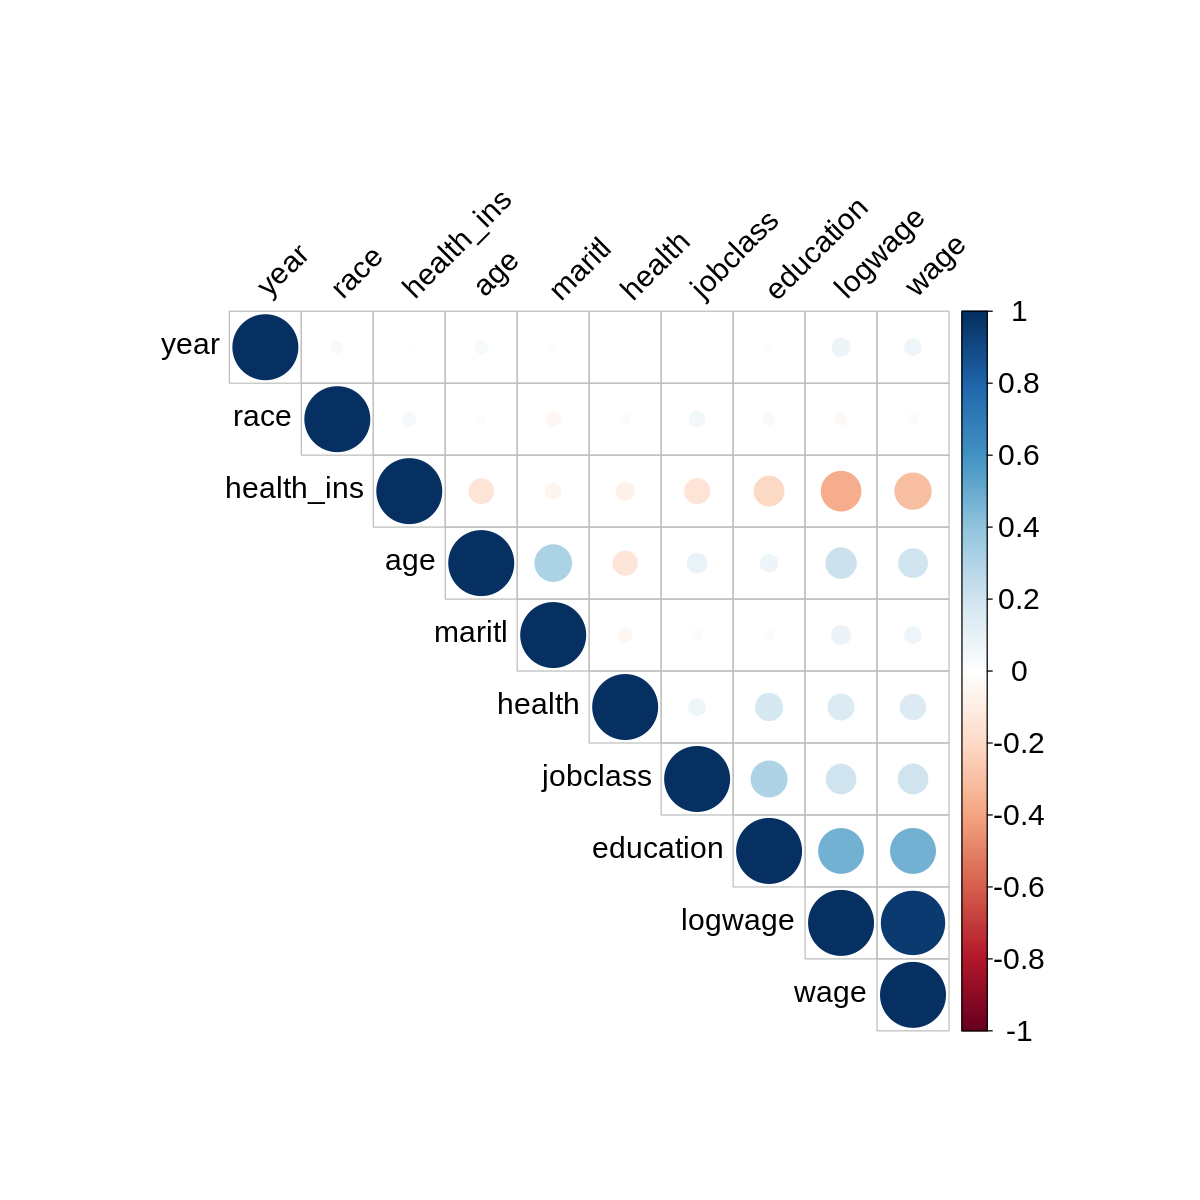

In [221]:
library(corrplot)

options(repr.plot.width=10, repr.plot.height=10)
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45, tl.cex=font_size_labels, 
         cl.cex=font_size_axis)

### **Relationships**
 


**Why:** 

Now we visualize the information already given by creating a matrix of scatterplots to see the reasonable relationships between the variables.
 
**Takeaway:**

Now we can try to predict some values, even though most relations amongs features above are not obvious and hard to see visually.
 


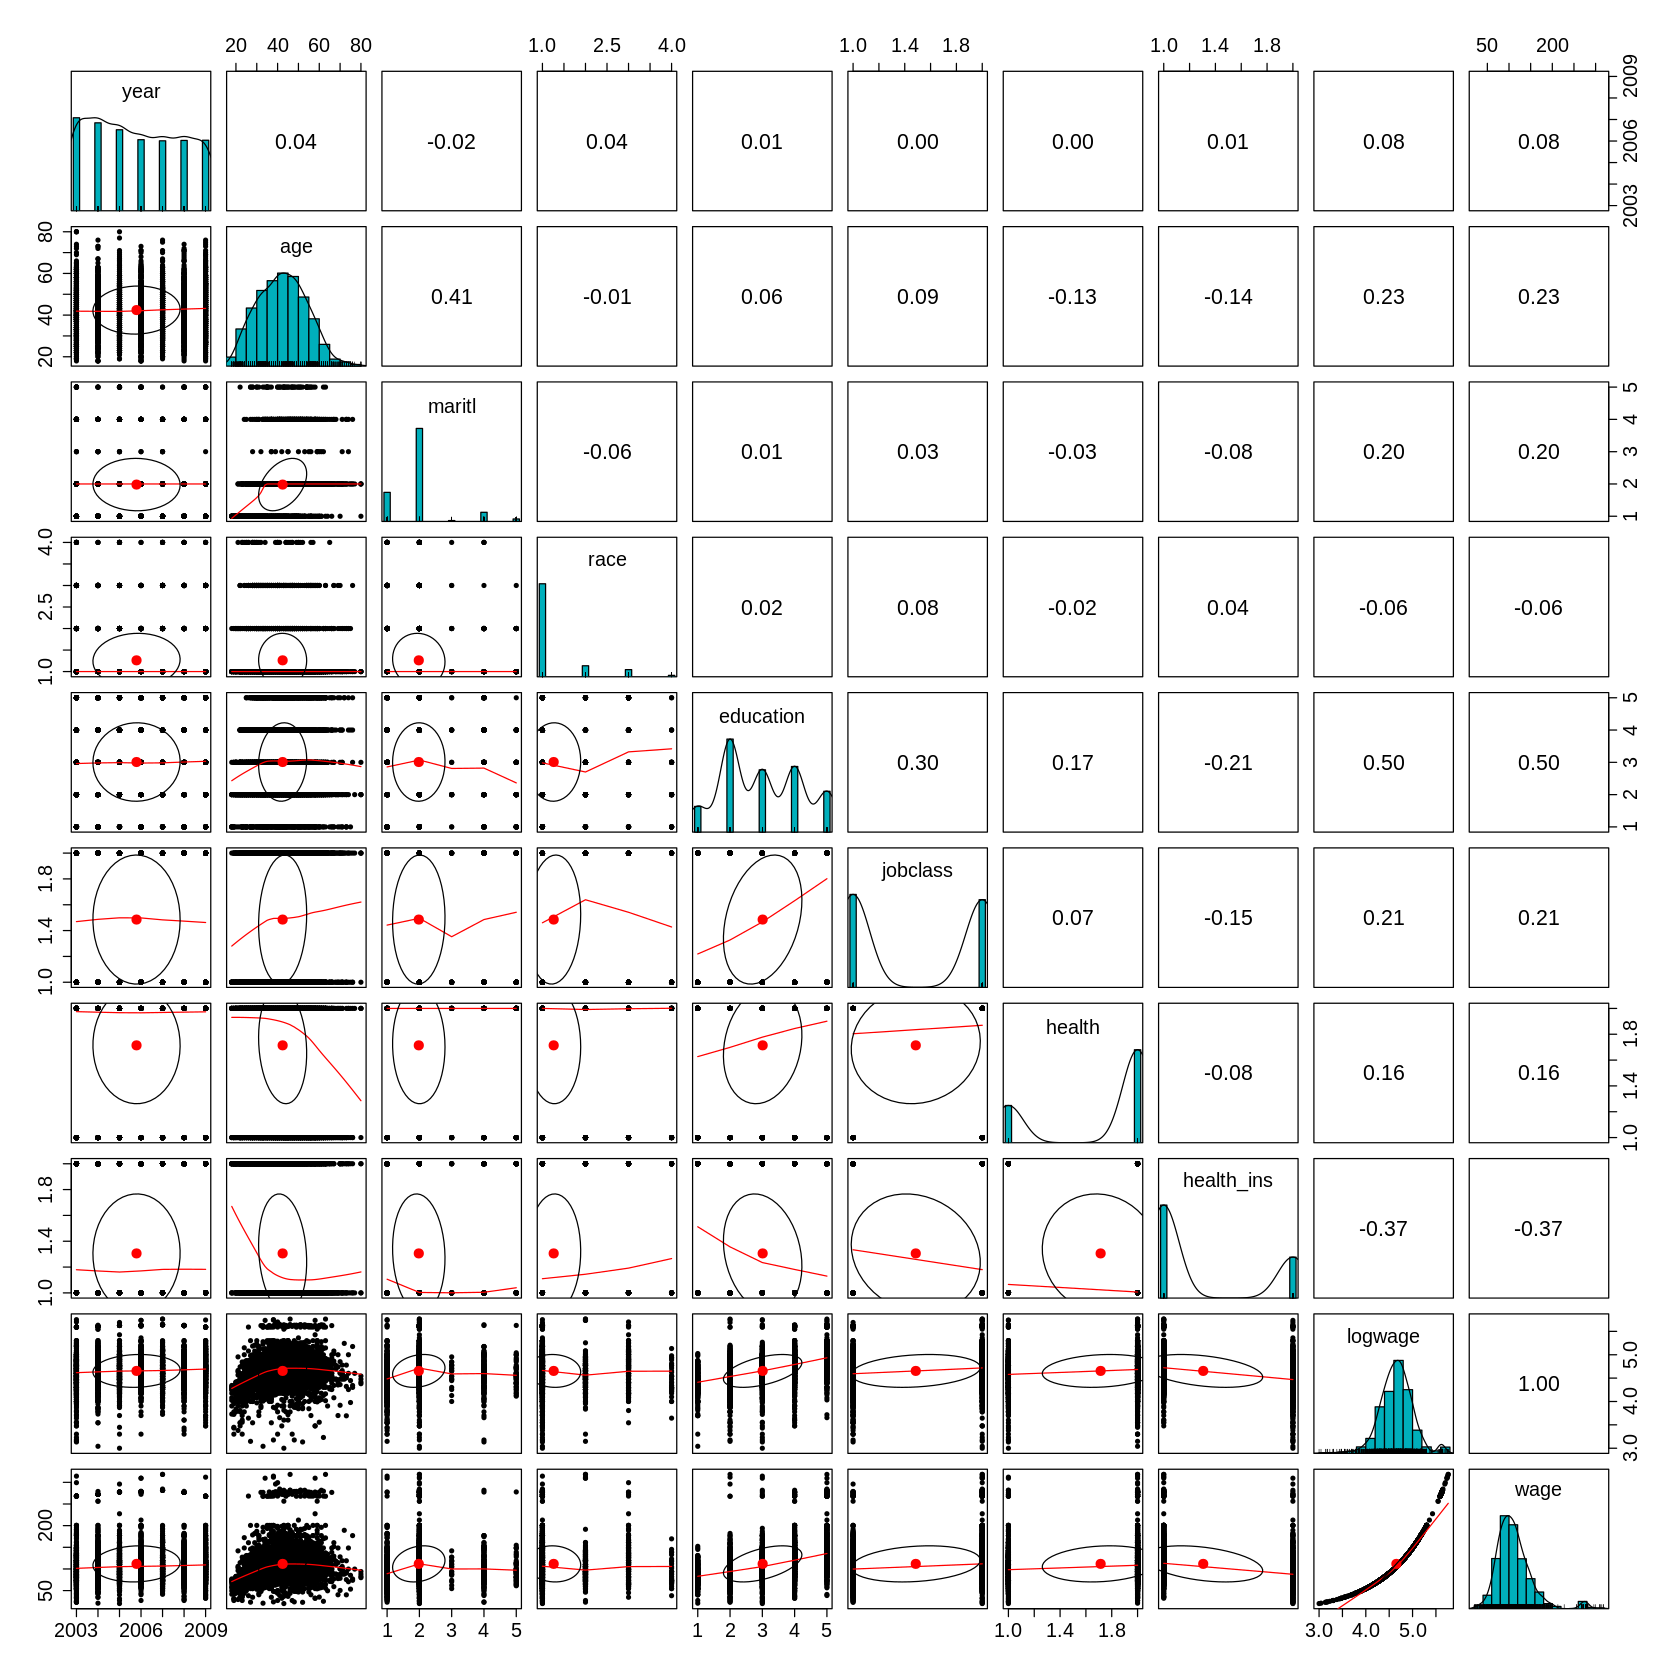

In [222]:
library(psych)

options(repr.plot.width=14, repr.plot.height=14)
pairs.panels(df, 
             method = "spearman", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE, # show correlation ellipses
             cex=font_size_labels,
             cex.labels=font_size_labels,
             cex.axis=font_size_axis
             )

### **Prediction**
 


In [223]:
library(ggplot2)
library(caret)

df <- Wage
#df$region <- NULL

inTrain <- createDataPartition(y=df$wage, p=0.8, list=FALSE)

train <- Wage[inTrain,]
test <- Wage[-inTrain,]

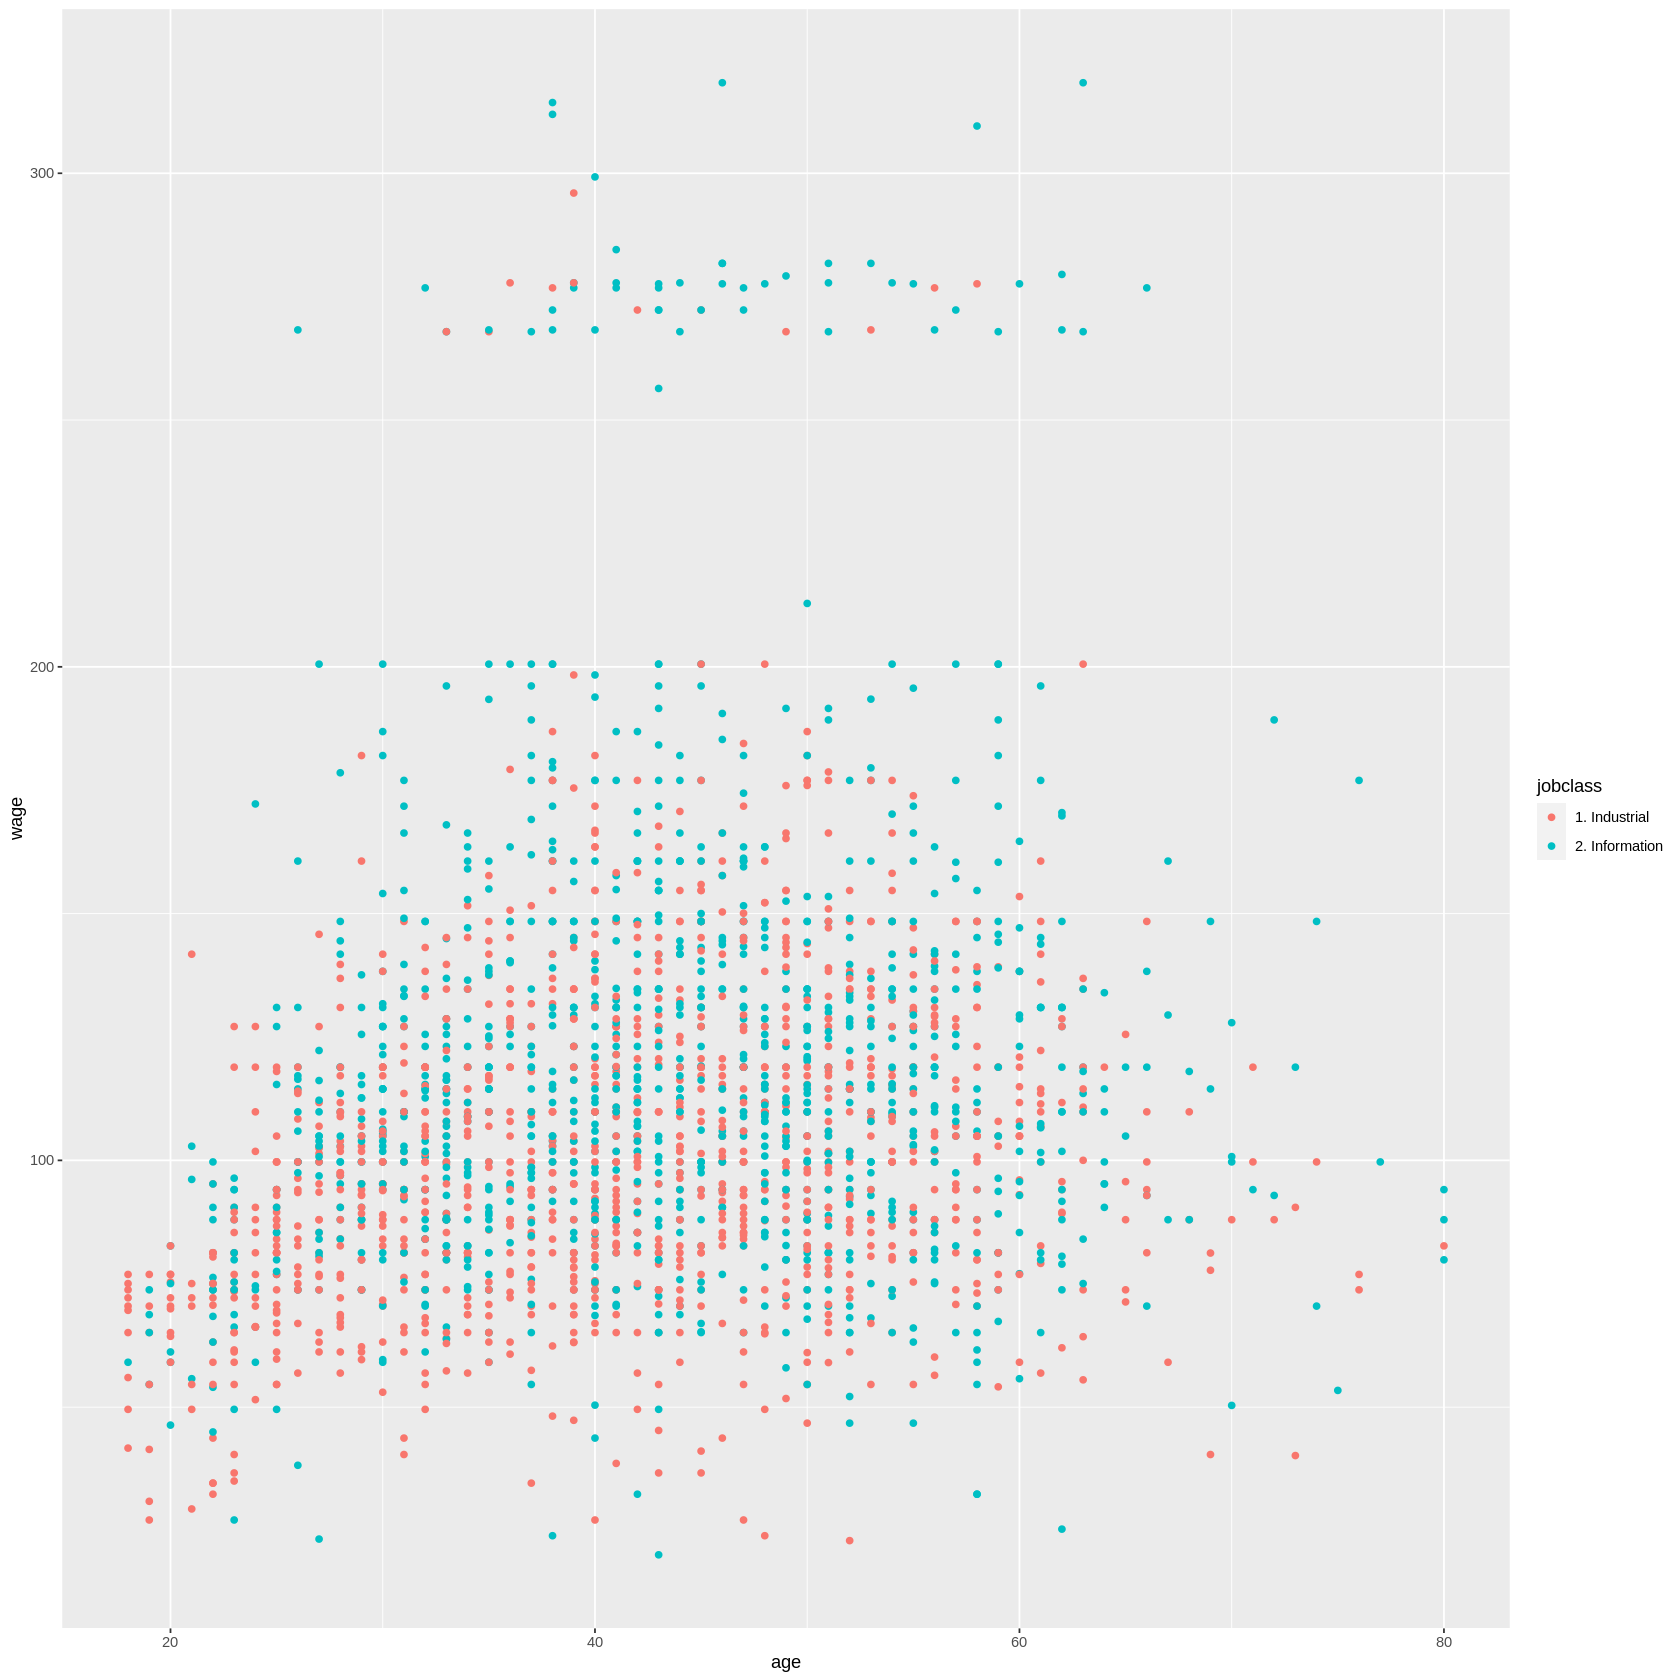

In [224]:
qplot(age,wage,colour=jobclass, data=train)

In [225]:
set.seed(934)
modFit<- caret::train(wage ~ age + jobclass + education, method = "lm",data=train)
finMod <- modFit$finalModel
print(modFit)

Linear Regression 

2402 samples
   3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2402, 2402, 2402, 2402, 2402, 2402, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  36.02118  0.2508583  24.82751

Tuning parameter 'intercept' was held constant at a value of TRUE


In [226]:
varImp(modFit)

lm variable importance

                              Overall
`education5. Advanced Degree` 100.000
`education4. College Grad`     65.341
age                            30.673
`education3. Some College`     28.560
`education2. HS Grad`           5.909
`jobclass2. Information`        0.000

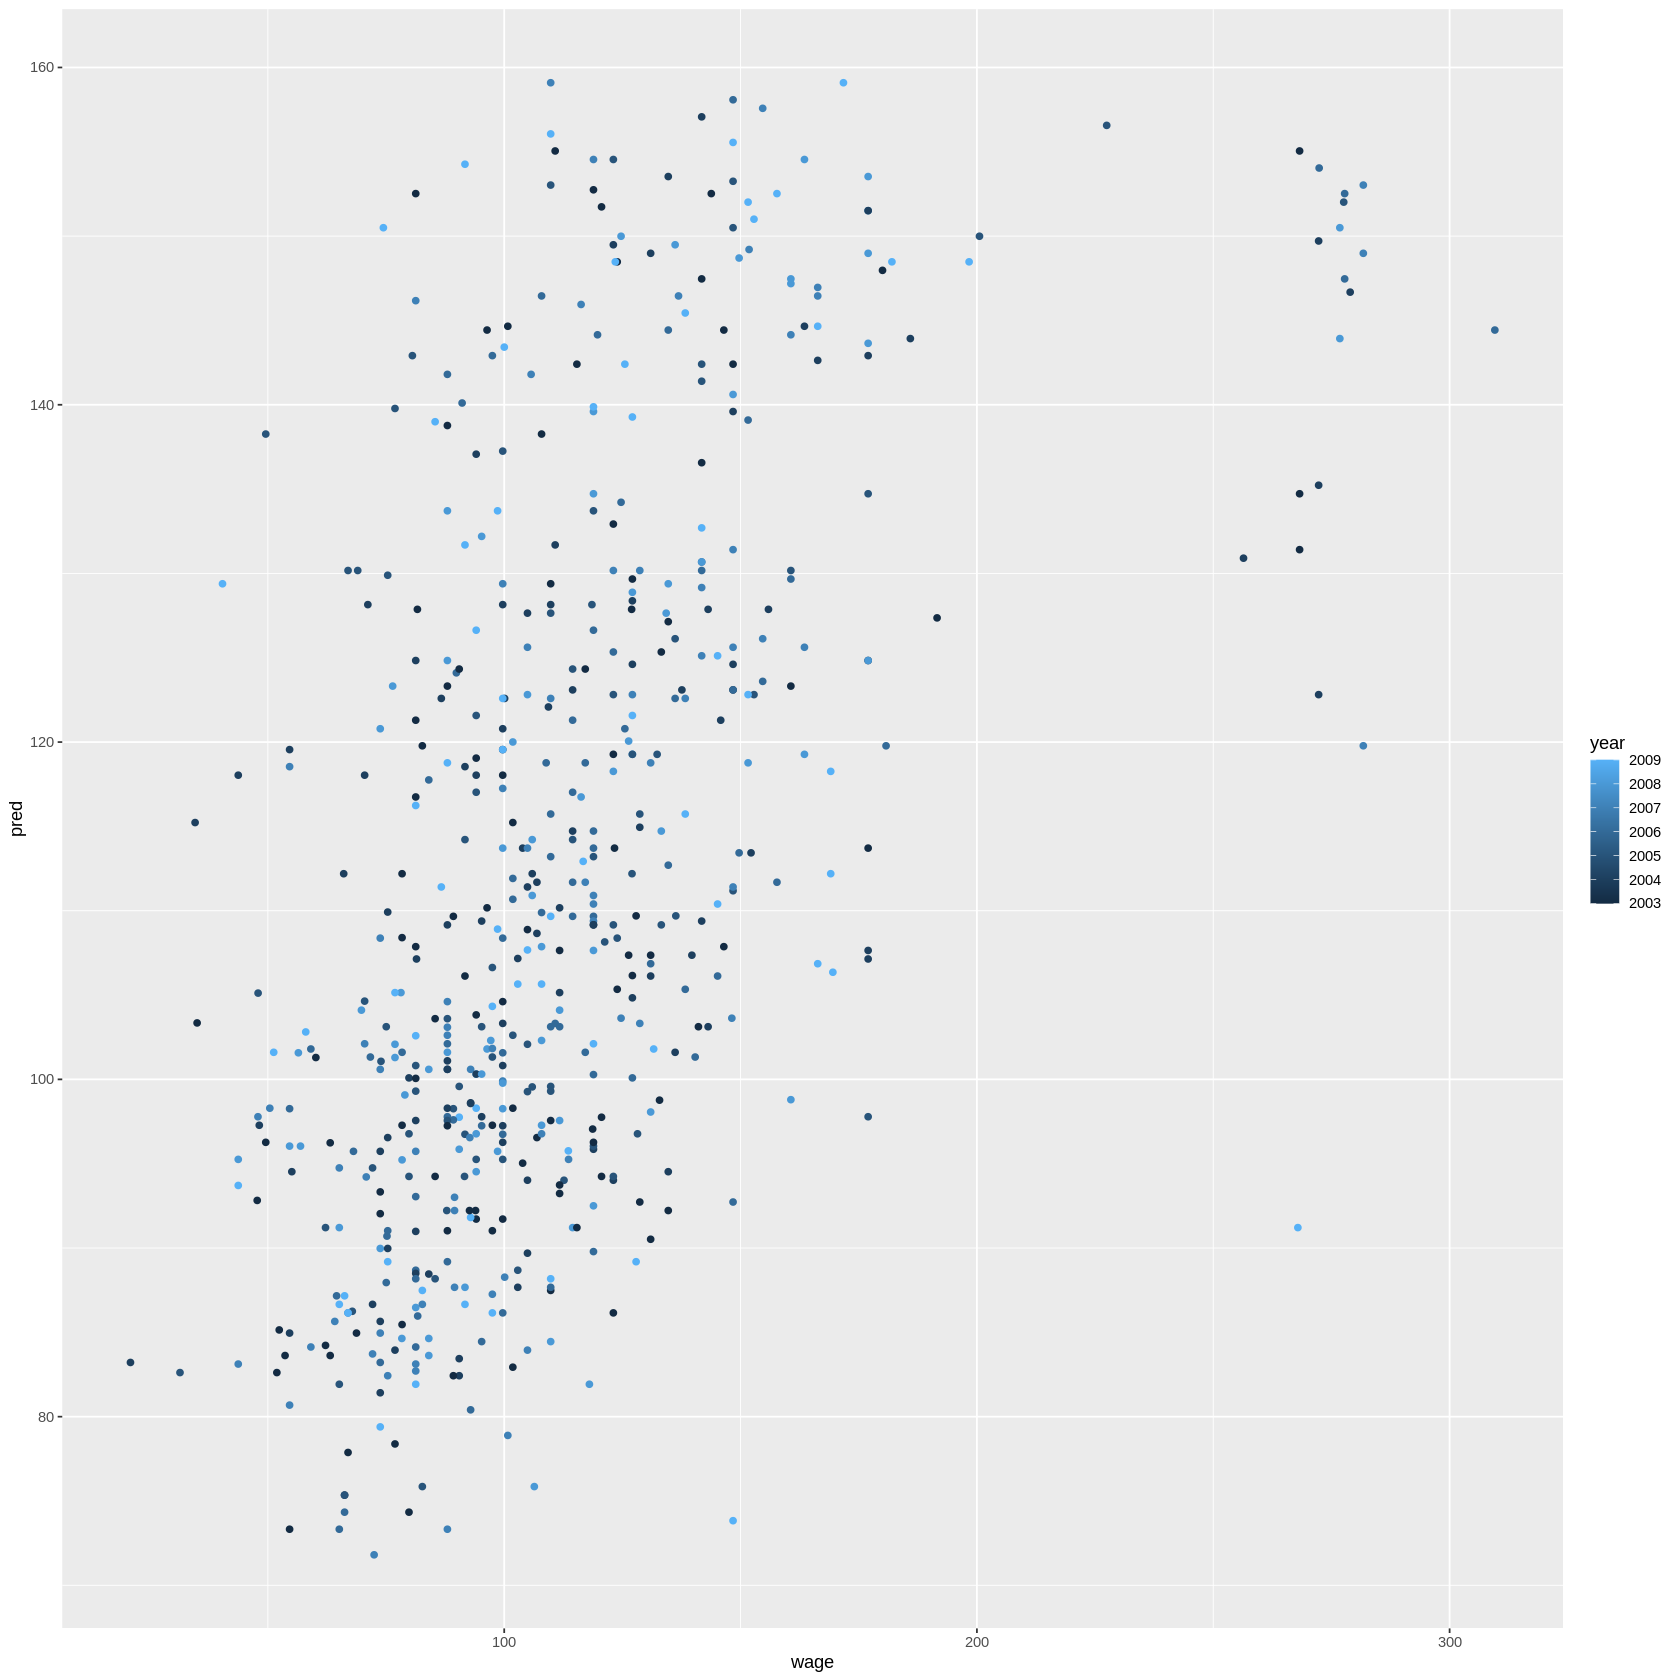

In [227]:
pred <- predict(modFit, test)
qplot(wage,pred,colour=year,data=test)

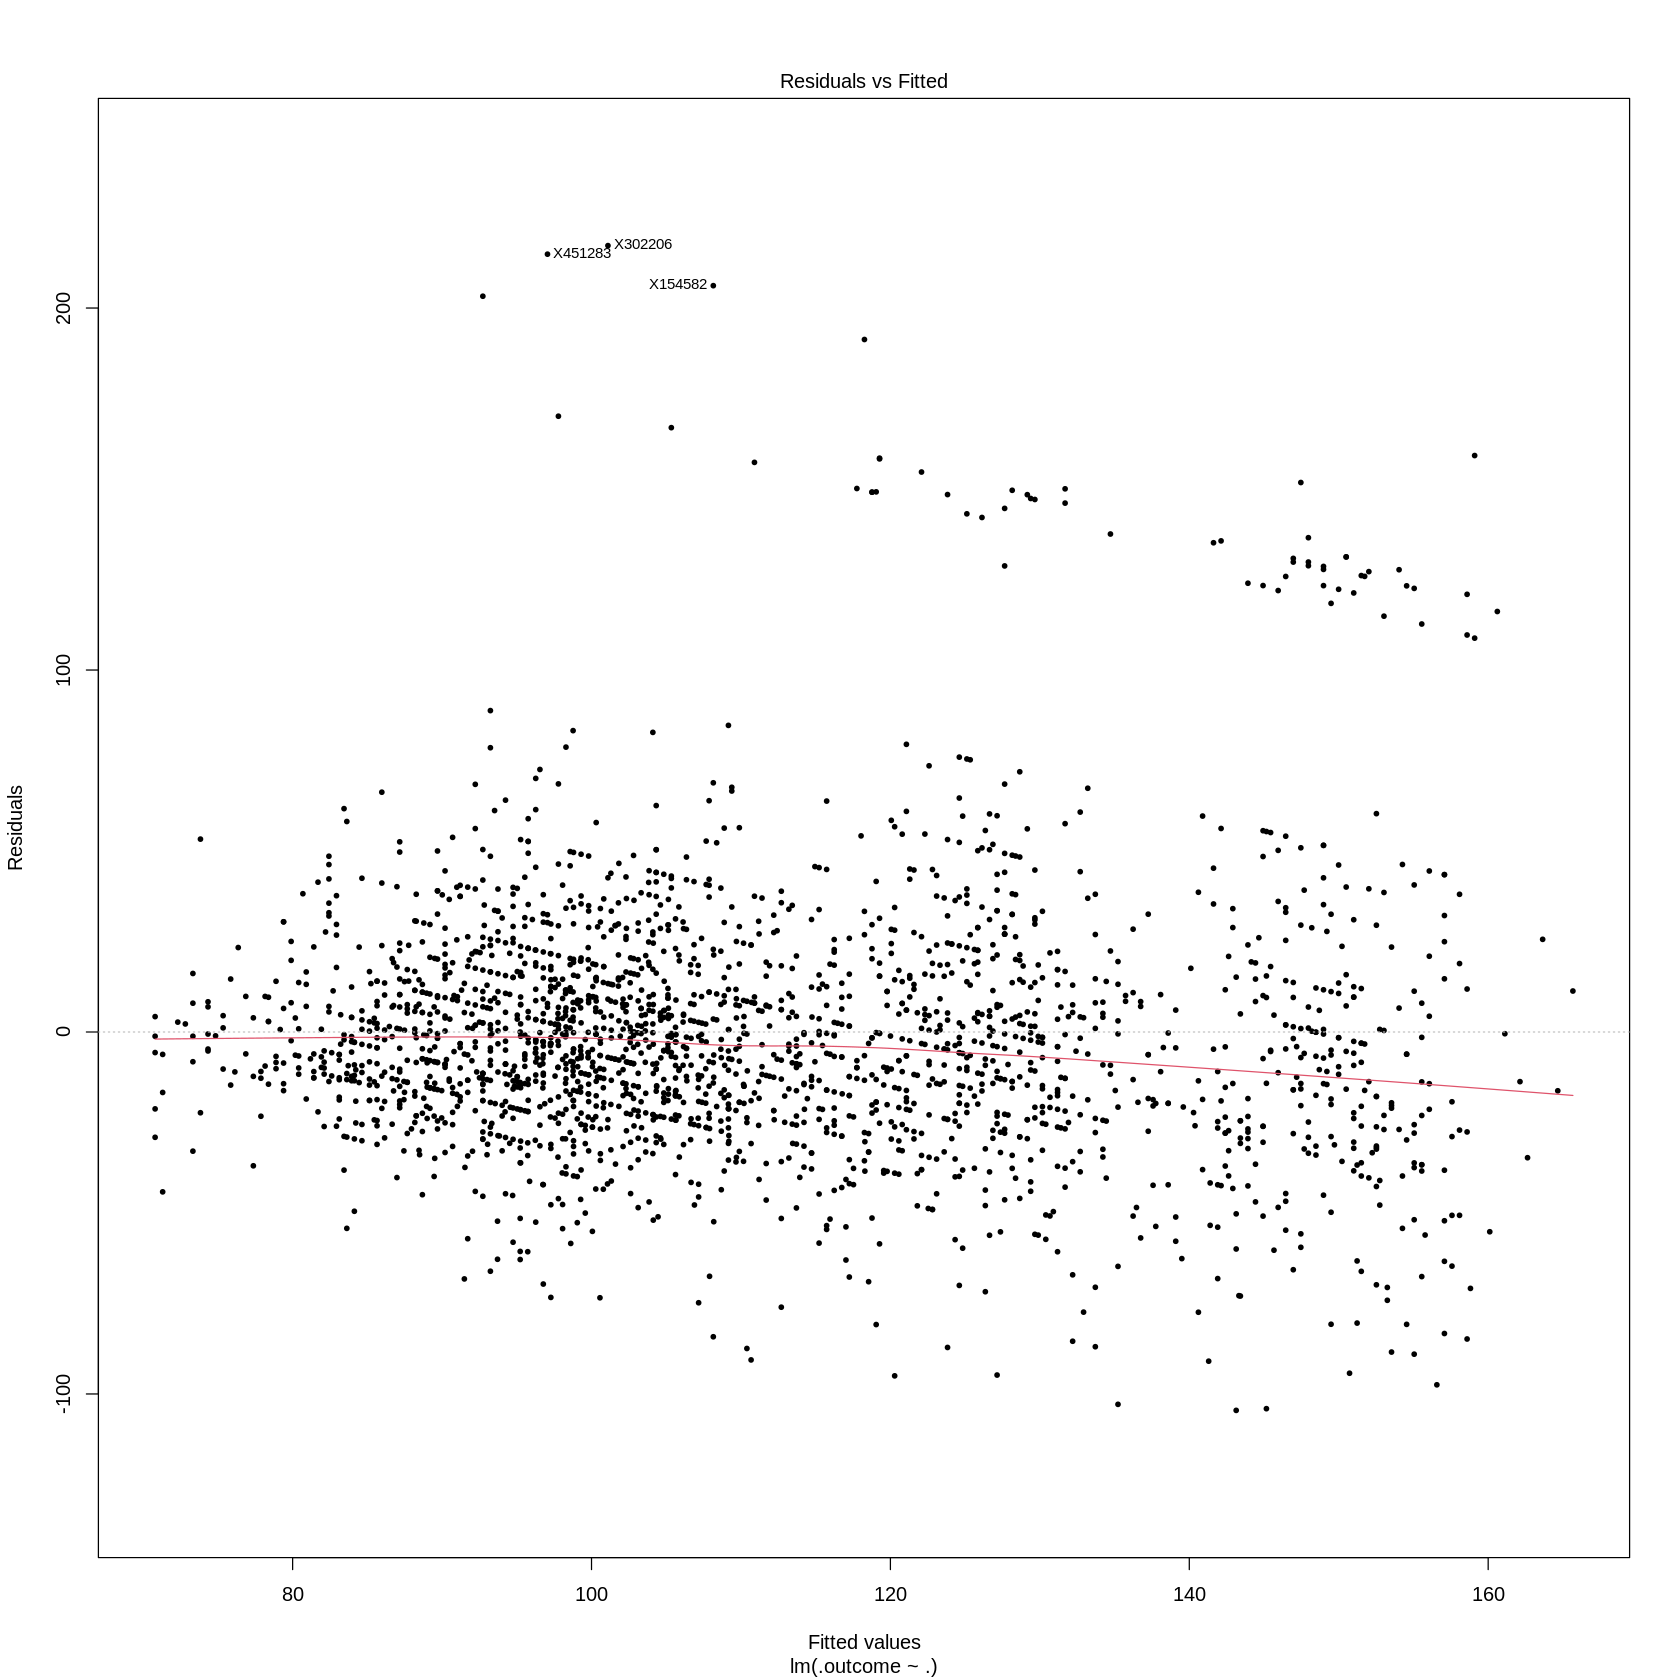

In [228]:
plot(finMod,1,pch=19,cex=0.5)

**Why:** 

Always nice to predict something :D

**Takeaway:**

Model's working "ok", considering a reasonable deviation (red line on the plot above)